In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #Naive bayes
from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.model_selection import train_test_split,cross_val_predict #training and testing data split
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

In [22]:
train=pd.read_csv('train.csv')

In [23]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


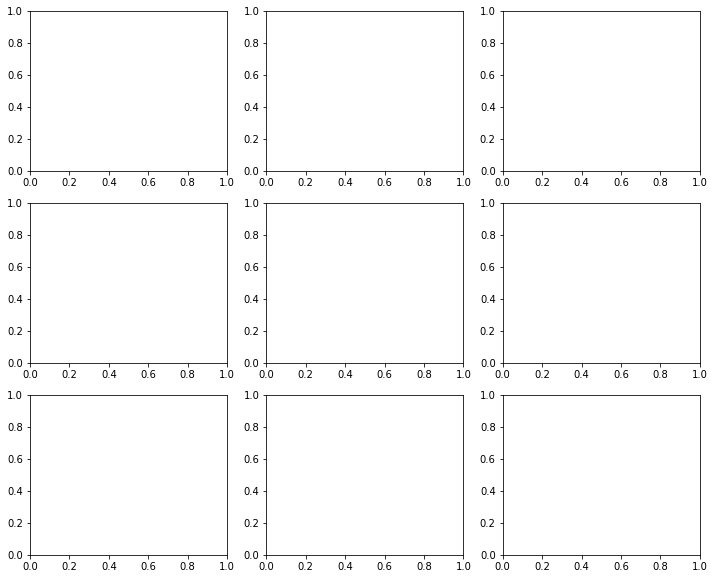

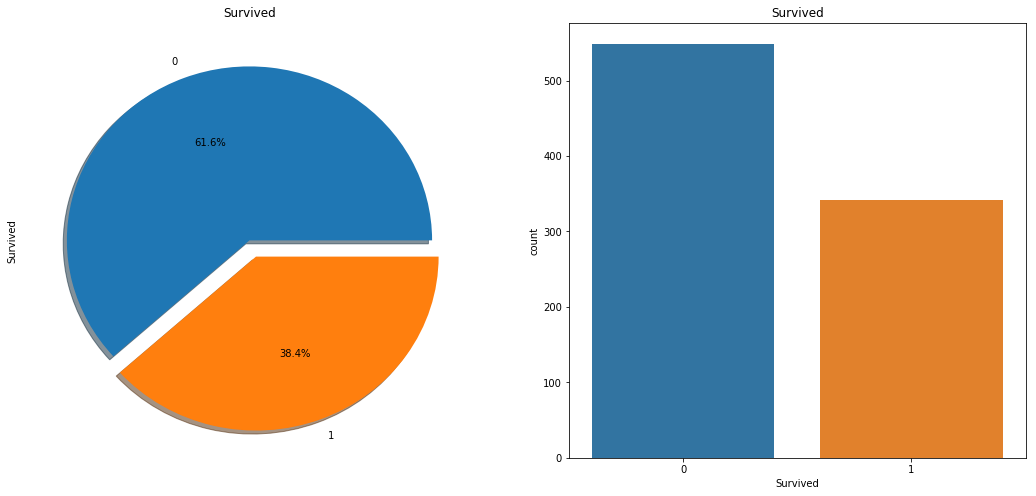

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))#row 1 and column 2
train['Survived'].value_counts().plot.pie(autopct='%1.1f%%',explode=[0,0.1],ax=ax[0],shadow=True)
ax[0].set_title('Survived')
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()
#autopct tells us the % on piechart#explode gives us the gap between the graph#Shadow makes it 3d#ax axes info


In [25]:
train.groupby(["Sex","Survived"]).count()['PassengerId']

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

In [26]:
train[["Sex","Survived"]].groupby(["Sex"]).mean()

,Survived
Sex,
female,0.742038
male,0.188908


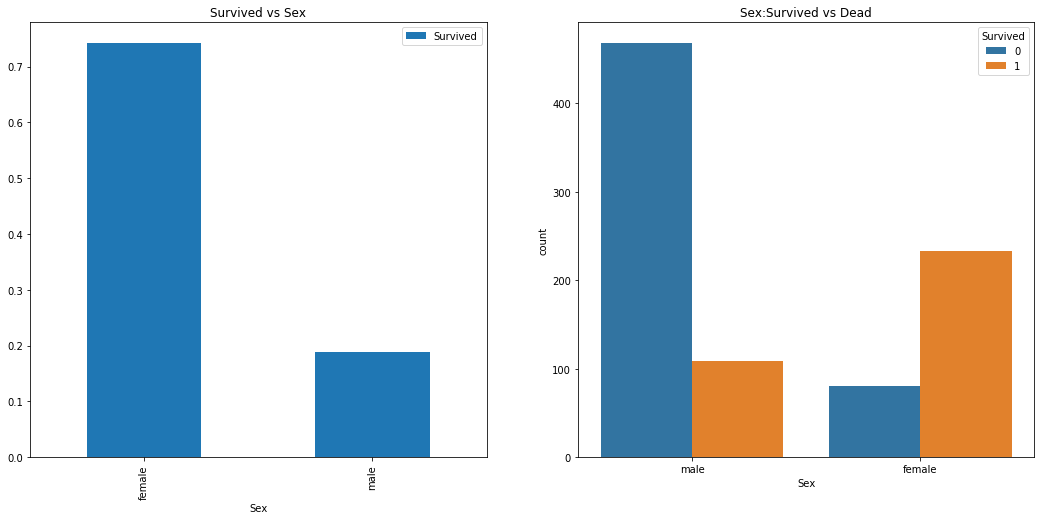

In [27]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')
sns.countplot('Sex',hue='Survived',data=train,ax=ax[1])#hue add a new value to sex. Here hue="survived"
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

In [28]:
pd.crosstab(train.Pclass,train.Survived,margins=True).style.background_gradient(cmap='summer_r')
#margins helps with All Columns

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


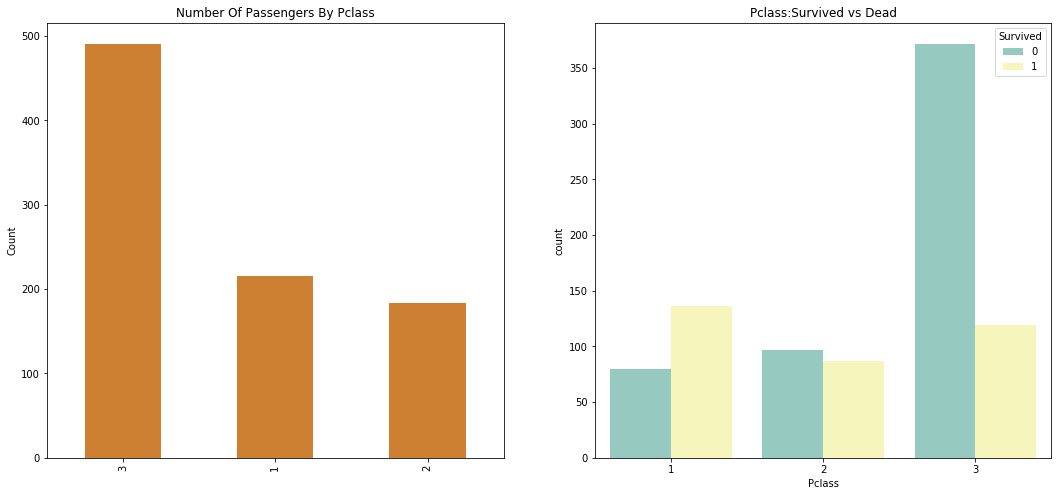

In [29]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of Passengers By Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=train,ax=ax[1], palette="Set3")
ax[1].set_title('Pclass:Survived vs Dead')
plt.show()
#palette help with coloring

In [30]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins=True).style.background_gradient(cmap='summer_r')

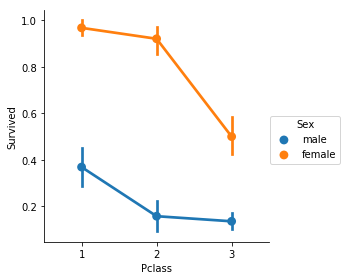

In [31]:
sns.factorplot('Pclass','Survived',hue='Sex',data=train)
plt.show()
#visualize it preet. Pclass belongs to x and Survived is sns.factorplot('Pclass','Survived',hue='Sex',data=train)
plt.show()#y ad hue means extra graph variable .
#factorplot can help with the Categorical values<--

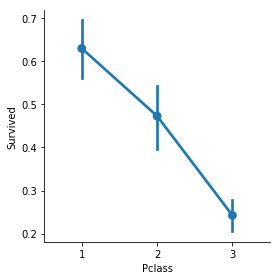

In [32]:
sns.factorplot('Pclass','Survived',data=train)
plt.show()

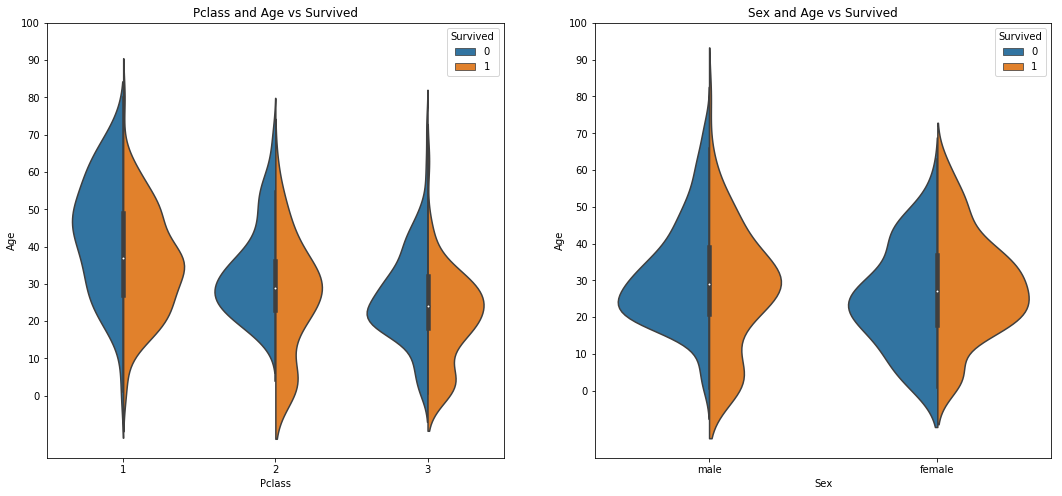

In [33]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot("Pclass","Age", hue="Survived", data=train,split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot("Sex","Age", hue="Survived", data=train,split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()
#the distribution of quantitative data(age) across several levels of one (or more) 
#categorical variables/Ordinal Variable(Pclass) such that those distributions can be compared

As we had seen earlier, the Age feature has 177 null values. To replace these NaN values, we can assign them the mean age of the dataset.

But the problem is, there were many people with many different ages. We just cant assign a 4 year kid with the mean age that is 29 years. Is there any way to find out what age-band does the passenger lie??

Bingo!!!!, we can check the Name feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

In [34]:
print(train['Name'][:5])
train['Initial']=0
for i in train:
    train['Initial']=train.Name.str.extract('([A-Za-z]+)\.') #lets extract the Salutations
#'([A-Za-z]+)\.' choose all values from a-z and A-Z,+ means the whole 1th word and\. means to choose the 2th word

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object


/home/harpreet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  after removing the cwd from sys.path.


In [35]:
pd.crosstab(train.Initial,train.Sex).T.style.background_gradient(cmap='summer_r') #Checking the Initials with the Sex

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [36]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)


In [37]:
train.groupby('Initial')['Age'].mean() 

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [38]:
## Assigning the NaN Values with the Ceil values of the mean ages
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age']=33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age']=36
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age']=5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age']=22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age']=46

In [39]:
train[train["Sex"]=="male"].PclassOnly a month is remaining now and I am worried

SyntaxError: invalid syntax (<ipython-input-39-622425e10d1f>, line 1)

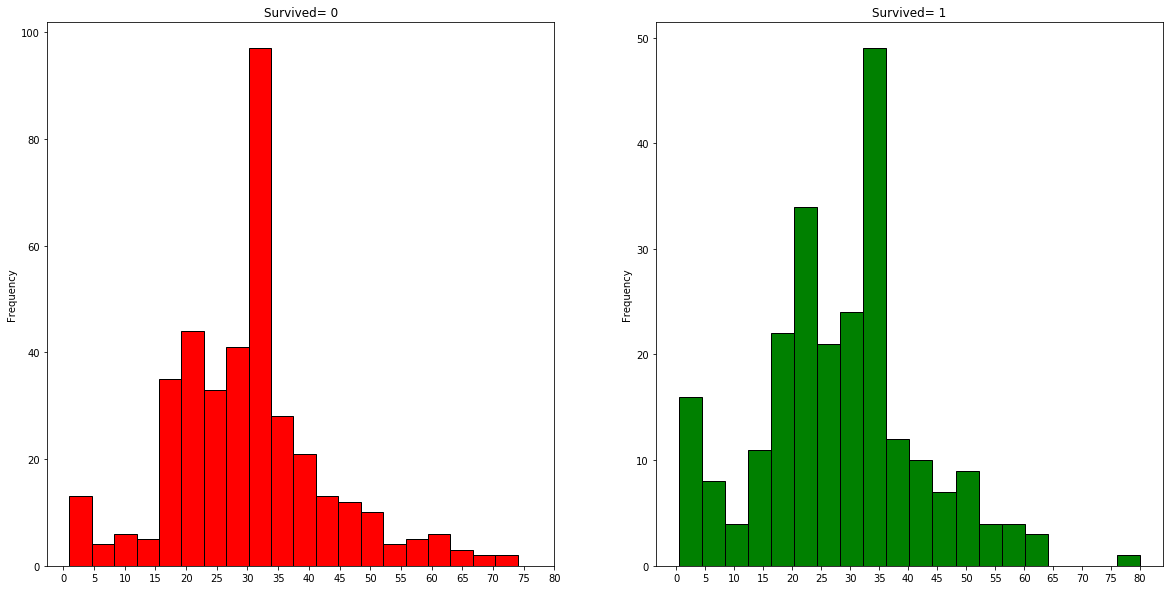

In [47]:
f,ax=plt.subplots(1,2,figsize=(20,10))
train[train['Survived']==0].Age.plot.hist(ax=ax[0],bins=20,edgecolor='black',color='red')
ax[0].set_title('Survived= 0')
x1=list(range(0,85,5))
ax[0].set_xticks(x1)
train[train['Survived']==1].Age.plot.hist(ax=ax[1],color='green',bins=20,edgecolor='black')
ax[1].set_title('Survived= 1')
x2=list(range(0,85,5))
ax[1].set_xticks(x2)
plt.show()

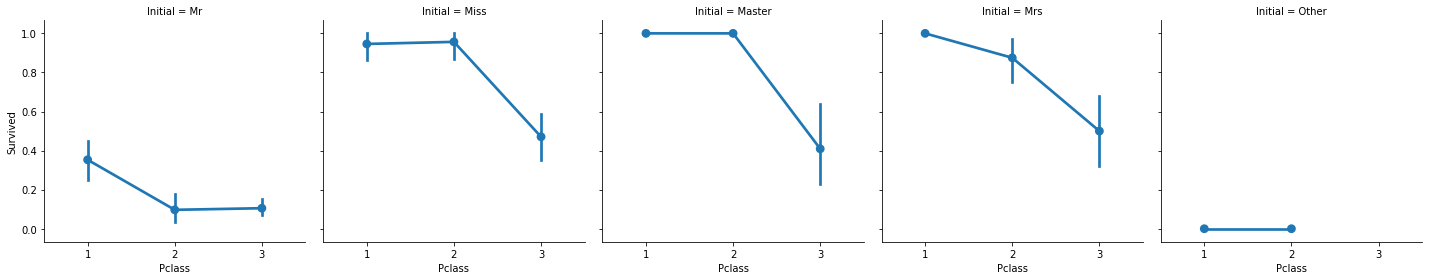

In [49]:
sns.factorplot('Pclass','Survived',col='Initial',data=train)
plt.show()
#col asks for a new graph for each intital, where hue worked on the same graph

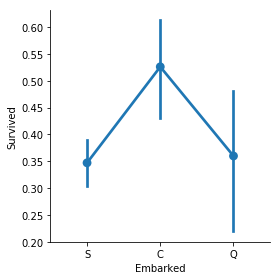

In [50]:
sns.factorplot('Embarked','Survived',data=train)
plt.show()

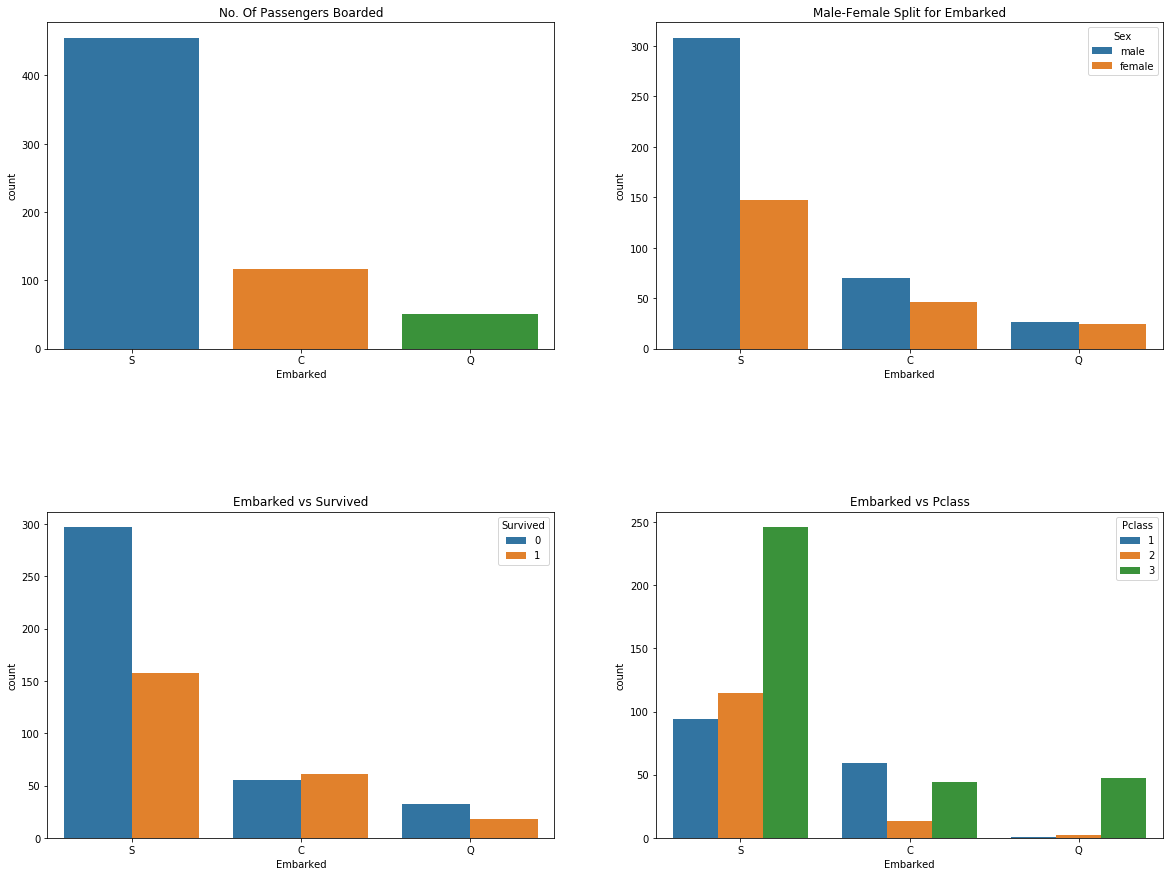

In [51]:
f,ax=plt.subplots(2,2,figsize=(20,15))#2 row and 2 columns, total 4 graphs
sns.countplot('Embarked',data=train,ax=ax[0,0])#0th row and 0th column
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

In [52]:
train['Embarked'].fillna('S',inplace=True)

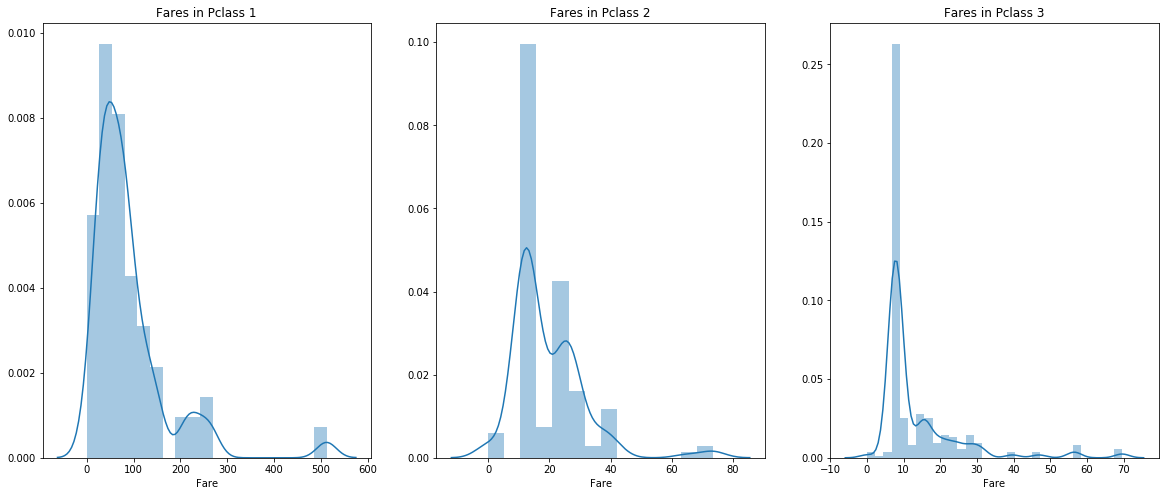

In [53]:
f,ax=plt.subplots(1,3,figsize=(20,8))
sns.distplot(train[train['Pclass']==1].Fare,ax=ax[0])
ax[0].set_title('Fares in Pclass 1')
sns.distplot(train[train['Pclass']==2].Fare,ax=ax[1])
ax[1].set_title('Fares in Pclass 2')
sns.distplot(train[train['Pclass']==3].Fare,ax=ax[2])
ax[2].set_title('Fares in Pclass 3')
plt.show()

/home/harpreet/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3193: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


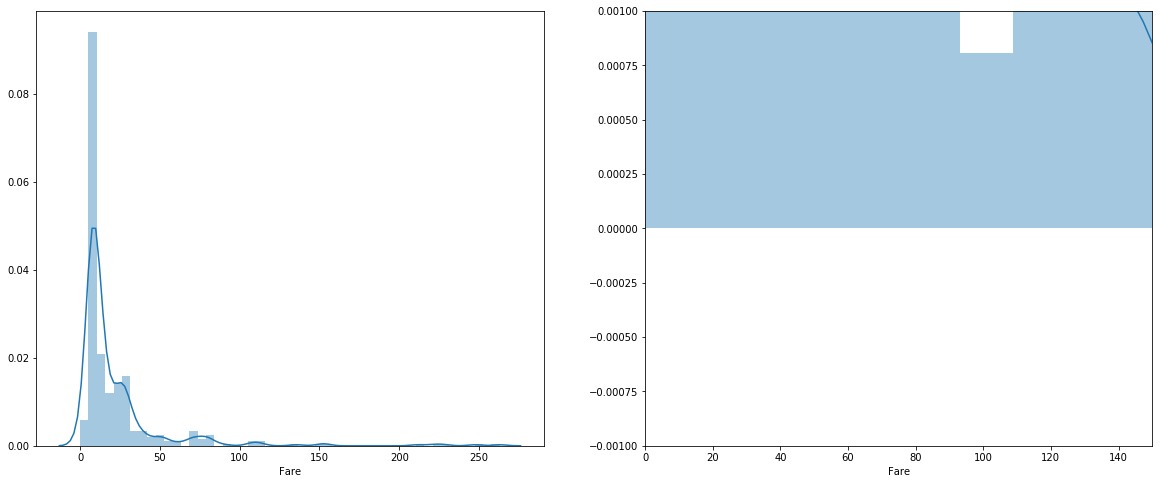

In [54]:
# train[train["Survived"]==0].Fare
# train[train["Survived"]==1].Fare
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.distplot(train[train["Survived"]==0].Fare,ax=ax[0])
sns.distplot(train[train["Survived"]==1].Fare,ax=ax[1])
plt.xlim(0,150)
plt.ylim(0.00,0.0)
plt.show()

In [55]:
train['Age_band']=0
train.loc[train['Age']<=16,'Age_band']=0
train.loc[(train['Age']>16)&(train['Age']<=32),'Age_band']=1
train.loc[(train['Age']>32)&(train['Age']<=48),'Age_band']=2
train.loc[(train['Age']>48)&(train['Age']<=64),'Age_band']=3
train.loc[train['Age']>64,'Age_band']=4
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
231,232,0,3,"Larsson, Mr. Bengt Edvin",male,29.0,0,0,347067,7.7750,NaN,S,Mr,1
836,837,0,3,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.6625,NaN,S,Mr,1


In [56]:
train['Family_Size']=0
train['Family_Size']=train['Parch']+train['SibSp']#family size
train['Alone']=0
train.loc[train.Family_Size==0,'Alone']=1#Alone


In [57]:
train['Fare_cat']=0
train.loc[train['Fare']<=7.91,'Fare_cat']=0
train.loc[(train['Fare']>7.91)&(train['Fare']<=14.454),'Fare_cat']=1
train.loc[(train['Fare']>14.454)&(train['Fare']<=31),'Fare_cat']=2
train.loc[(train['Fare']>31)&(train['Fare']<=513),'Fare_cat']=3

In [58]:
train['Sex'].replace(['male','female'],[0,1],inplace=True)
train['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
train['Initial'].replace(['Mr','Mrs','Miss','Master','Other'],[0,1,2,3,4],inplace=True)

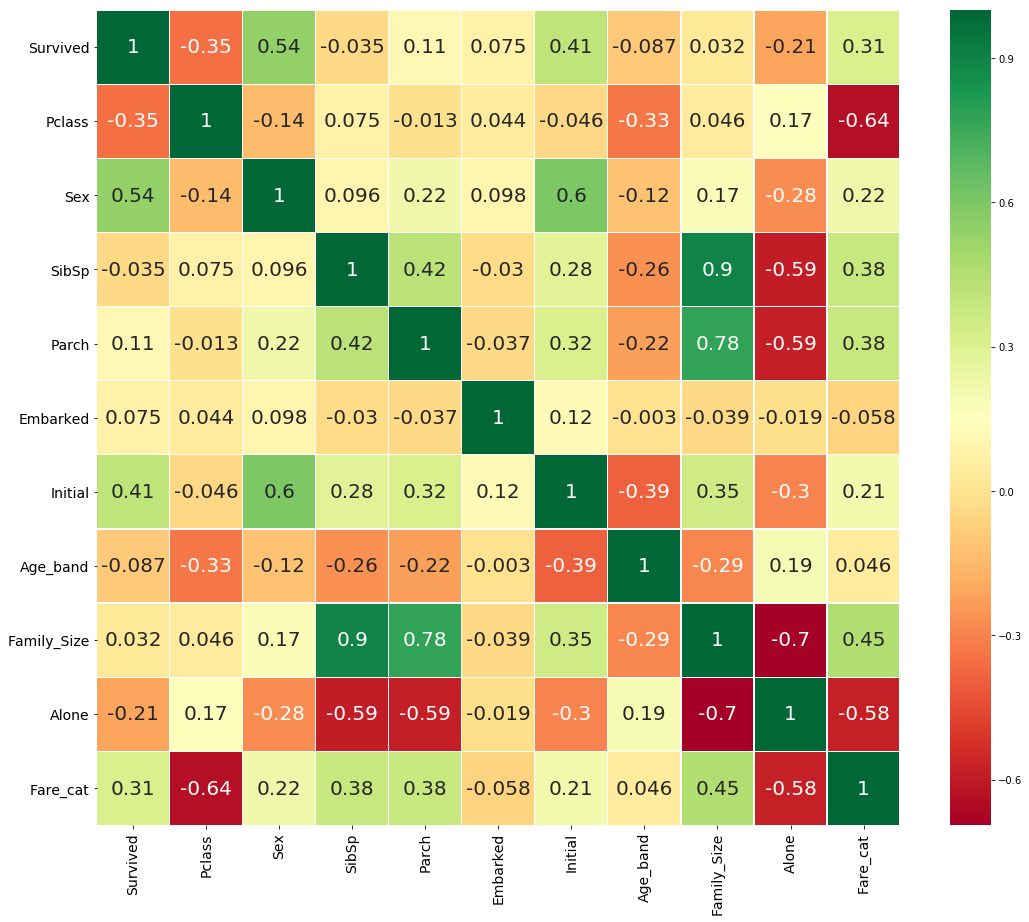

In [59]:
train.drop(['Name','Age','Ticket','Fare','Cabin','PassengerId'],axis=1,inplace=True)
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':20})
fig=plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
#write this down

In [60]:
train,test=train_test_split(train,test_size=0.3,random_state=0,stratify=train['Survived'])
train_X=train[train.columns[1:]]
train_Y=train[train.columns[:1]]
test_X=test[test.columns[1:]]
test_Y=test[test.columns[:1]]
X=train[train.columns[1:]]
Y=train['Survived']

In [61]:
X

,Pclass,Sex,SibSp,Parch,Embarked,Initial,Age_band,Family_Size,Alone,Fare_cat
110,1,0,0,0,0,0,2,0,1,3
31,1,1,1,0,1,1,2,1,0,3
13,3,0,1,5,0,0,2,6,0,3
455,3,0,0,0,1,0,1,0,1,0
544,1,0,1,0,1,0,3,1,0,3
102,1,0,0,1,0,0,1,1,0,3
171,3,0,4,1,2,3,0,5,0,2
760,3,0,0,0,0,0,2,0,1,2
550,1,0,0,2,1,0,1,2,0,3
11,1,1,0,0,0,2,3,0,1,2


In [62]:
train.drop("Initial",axis=1,inplace=True)

In [63]:
train.head()

,Survived,Pclass,Sex,SibSp,Parch,Embarked,Age_band,Family_Size,Alone,Fare_cat
110,0,1,0,0,0,0,2,0,1,3
31,1,1,1,1,0,1,2,1,0,3
13,0,3,0,1,5,0,2,6,0,3
455,1,3,0,0,0,1,1,0,1,0
544,0,1,0,1,0,1,3,1,0,3


In [64]:
from sklearn.model_selection import KFold #for K-fold cross validation
from sklearn.model_selection import cross_val_score #score evaluation
from sklearn.model_selection import cross_val_predict #prediction
kfold = KFold(n_splits=10, random_state=22) # k=10, split the train into 10 equal parts
xyz=[]
accuracy=[]
std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree','Naive Bayes','Random Forest']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=9),DecisionTreeClassifier(),GaussianNB(),RandomForestClassifier(n_estimators=100)]
for i in models:
    model = i
    cv_result = cross_val_score(model,X,Y, cv = kfold,scoring = "accuracy")
    cv_result=cv_result
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    accuracy.append(cv_result)
new_models_Dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)       
new_models_Dataframe2

,CV Mean,Std
Linear Svm,0.770825,0.042402
Radial Svm,0.796247,0.056114
Logistic Regression,0.784725,0.045744
KNN,0.773256,0.053645
Decision Tree,0.791649,0.048099
Naive Bayes,0.773309,0.063690
Random Forest,0.809937,0.041050


In [65]:
accuracy

[array([ 0.75      ,  0.70454545,  0.72727273,  0.75      ,  0.84090909,
         0.77272727,  0.8372093 ,  0.74418605,  0.79069767,  0.79069767]),
 array([ 0.77272727,  0.70454545,  0.70454545,  0.79545455,  0.84090909,
         0.79545455,  0.88372093,  0.81395349,  0.79069767,  0.86046512]),
 array([ 0.70454545,  0.75      ,  0.75      ,  0.75      ,  0.81818182,
         0.79545455,  0.8372093 ,  0.86046512,  0.76744186,  0.81395349]),
 array([ 0.77272727,  0.77272727,  0.70454545,  0.70454545,  0.77272727,
         0.77272727,  0.72093023,  0.88372093,  0.8372093 ,  0.79069767]),
 array([ 0.77272727,  0.77272727,  0.70454545,  0.72727273,  0.81818182,
         0.79545455,  0.79069767,  0.81395349,  0.86046512,  0.86046512]),
 array([ 0.68181818,  0.77272727,  0.63636364,  0.79545455,  0.77272727,
         0.81818182,  0.81395349,  0.81395349,  0.76744186,  0.86046512]),
 array([ 0.84090909,  0.77272727,  0.75      ,  0.79545455,  0.79545455,
         0.77272727,  0.79069767,  0.88

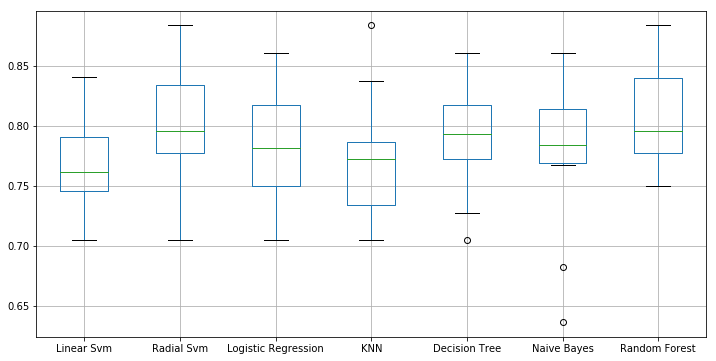

In [66]:
plt.subplots(figsize=(12,6))
box=pd.DataFrame(accuracy,index=[classifiers])
box.T.boxplot()
plt.show()

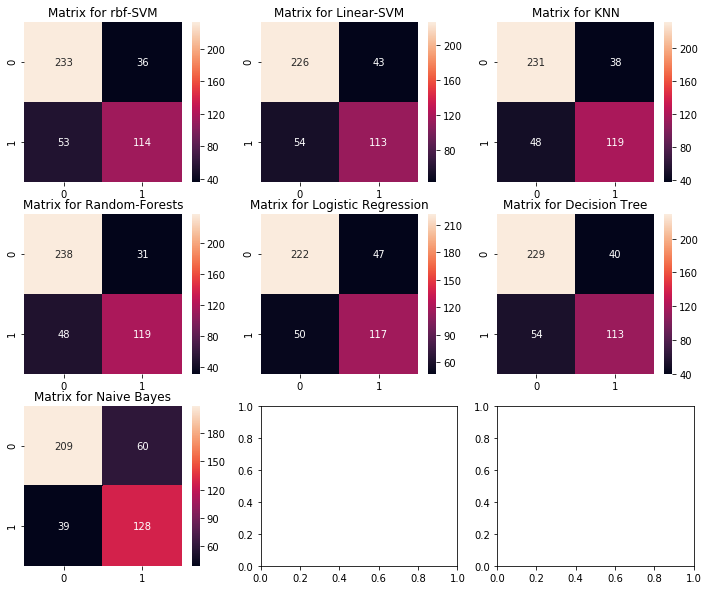

In [67]:
f,ax=plt.subplots(3,3,figsize=(12,10))
y_pred = cross_val_predict(svm.SVC(kernel='rbf'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,0],annot=True,fmt='2.0f')
ax[0,0].set_title('Matrix for rbf-SVM')
y_pred = cross_val_predict(svm.SVC(kernel='linear'),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,1],annot=True,fmt='2.0f')
ax[0,1].set_title('Matrix for Linear-SVM')
y_pred = cross_val_predict(KNeighborsClassifier(n_neighbors=9),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[0,2],annot=True,fmt='2.0f')
ax[0,2].set_title('Matrix for KNN')
y_pred = cross_val_predict(RandomForestClassifier(n_estimators=100),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,0],annot=True,fmt='2.0f')
ax[1,0].set_title('Matrix for Random-Forests')
y_pred = cross_val_predict(LogisticRegression(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,1],annot=True,fmt='2.0f')
ax[1,1].set_title('Matrix for Logistic Regression')
y_pred = cross_val_predict(DecisionTreeClassifier(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[1,2],annot=True,fmt='2.0f')
ax[1,2].set_title('Matrix for Decision Tree')
y_pred = cross_val_predict(GaussianNB(),X,Y,cv=10)
sns.heatmap(confusion_matrix(Y,y_pred),ax=ax[2,0],annot=True,fmt='2.0f')
ax[2,0].set_title('Matrix for Naive Bayes')
plt.subplots_adjust(hspace=0.2,wspace=0.2)
plt.show()